# MONTE CARLO SIMULATION

## Overview of the Model

The following section will explain the model

In [110]:
#Importing all the necessary librairies
import pandas as pd
import numpy as np
import pathlib
import matplotlib.pyplot as plt


In [111]:
#changing the pandas visibility settings for a better view

pd.set_option("expand_frame_repr", False) #allowing visibility fo all the rows
pd.set_option("display.precision", 4) #truncating all the values to 4 decimal places
pd.set_option("colheader_justify", "left") #the column names will be aligned left
pd.set_option('display.max_rows', None) #allowing display fo all rows

### Organising data

In [121]:
#HUL data
df1: pd.DataFrame = pd.read_csv('/Users/ashitasrivastava/Desktop/stocks_data/HUL_data.csv')
df1['Name']='HUL'
columns_to_drop = ['Open','High','Low','Adj Close','Volume']
df1 = df1.drop(columns=columns_to_drop, axis=1)
df1.columns=list(['Date','Price','Name'])

#ITC data
df2: pd.DataFrame = pd.read_csv('/Users/ashitasrivastava/Desktop/stocks_data/ITC_data.csv')
df2['Name']='ITC'
columns_to_drop = ['Open','High','Low','Adj Close','Volume']
df2 = df2.drop(columns=columns_to_drop, axis=1)
df2.columns=list(['Date','Price','Name'])
df2

#BHEL_data
df3: pd.DataFrame = pd.read_csv('/Users/ashitasrivastava/Desktop/stocks_data/BHEL_data.csv')
df3['Name']='BHEL'
columns_to_drop = ['Open','High','Low','Adj Close','Volume']
df3 = df3.drop(columns=columns_to_drop, axis=1)
df3.columns=list(['Date','Price','Name'])
df3

#HCL_data
df4: pd.DataFrame = pd.read_csv('/Users/ashitasrivastava/Desktop/stocks_data/HCL_data.csv')
df4['Name']='HCL'
columns_to_drop = ['Open','High','Low','Adj Close','Volume']
df4 = df4.drop(columns=columns_to_drop, axis=1)
df4.columns=list(['Date','Price','Name'])
df4

#BEL_data
df5: pd.DataFrame = pd.read_csv('/Users/ashitasrivastava/Desktop/stocks_data/BEL_data.csv')
df5['Name']='BEL'
columns_to_drop = ['Open','High','Low','Adj Close','Volume']
df5 = df5.drop(columns=columns_to_drop, axis=1)
df5.columns=list(['Date','Price','Name'])
df5

#ADANI_ENTERPRISES_data
df6: pd.DataFrame = pd.read_csv('/Users/ashitasrivastava/Desktop/stocks_data/ADANI_ENTERPRISES_data.csv')
df6['Name']='Adani Enterprises'
columns_to_drop = ['Open','High','Low','Adj Close','Volume']
df6 = df6.drop(columns=columns_to_drop, axis=1)
df6.columns=list(['Date','Price','Name'])
df6

#SPY_data
df7: pd.DataFrame = pd.read_csv('/Users/ashitasrivastava/Desktop/stocks_data/SPY.csv')
df7['Name']='SPYL'
columns_to_drop = ['Open','High','Low','Adj Close','Volume']
df7 = df7.drop(columns=columns_to_drop, axis=1)
df7.columns=list(['Date','Price','Name'])
df7

#VUSA_data
df9: pd.DataFrame = pd.read_csv('/Users/ashitasrivastava/Desktop/stocks_data/VUSA_data.csv')
df9['Name']='VUSA'
columns_to_drop = ['Open','High','Low','Adj Close','Volume']
df9 = df9.drop(columns=columns_to_drop, axis=1)
df9.columns=list(['Date','Price','Name'])
df9

#TATASTEEL_data
df10: pd.DataFrame = pd.read_csv('/Users/ashitasrivastava/Desktop/stocks_data/TATASTEEL_data.csv')
df10['Name']='Tata Steel'
columns_to_drop = ['Open','High','Low','Adj Close','Volume']
df10 = df10.drop(columns=columns_to_drop, axis=1)
df10.columns=list(['Date','Price','Name'])
df10

#making a list of the names of all the stocks

Names=['HUL','ITC','BHEL','HCL','BEL','Adani Enterprises','SPY','VUSA','Tata Steel']
number_of_names=len(Names)

#creating the final data frame

final_df=pd.concat([df1,df2,df3,df4,df5,df6,df7,df9,df10],axis=0)
final_df

final_df = final_df.pivot(
    index='Date',
    columns='Name',
    values='Price'
)

final_df.to_csv('final_df.csv')
#cleaning the dataset by dropping any row with null value
final_df.dropna(inplace=True)

#display the final dataset
final_df.head()


Name,Adani Enterprises,BEL,BHEL,HCL,HUL,ITC,SPYL,Tata Steel,VUSA
Date,,,,,,,,,
2022-11-07,3960.6001,109.65,75.85,112.80,2532.8000,353.50,379.95,106.70,71.04
2022-11-09,3997.2000,108.05,74.80,113.25,2508.8000,360.70,374.13,106.10,70.98
2022-11-10,3992.2500,106.70,75.55,110.75,2513.6001,356.00,394.69,104.70,71.94
2022-11-11,4008.8501,107.30,74.50,113.65,2503.0500,356.35,398.51,107.55,71.00
2022-11-14,4022.5500,106.60,71.40,116.45,2457.8000,347.20,395.12,108.70,71.38


### Current Market conditions in terms of the statistical measurements

In [123]:
final_df.describe()

Name,Adani Enterprises,BEL,BHEL,HCL,HUL,ITC,SPYL,Tata Steel,VUSA
count,235.0000,235.0000,235.0000,235.0000,235.0000,235.0000,235.0000,235.0000,235.0000
mean,2578.0523,113.7211,91.0389,122.1970,2567.7117,406.8411,417.2332,114.1681,71.9550
std,765.8804,15.9227,19.9875,20.6254,79.6479,46.8705,21.6276,7.6160,2.4421
min,1193.5000,88.9500,67.1000,94.6500,2406.1001,326.7000,374.1300,102.1000,66.8700
25%,1922.6250,99.9500,75.9750,105.7750,2501.1000,373.7250,398.7250,107.6500,70.0750
50%,2445.1001,107.9000,83.2000,115.8000,2556.1499,424.6000,413.0100,112.0000,71.8800
75%,2624.3250,128.7750,100.6500,141.0000,2639.7750,445.8000,436.4450,119.4500,74.1900
max,4165.2998,144.7000,145.3000,168.5500,2757.1001,492.1500,457.7900,131.9500,76.1800


### Statistical Measures

The statistical measures used for finding the optimised portfolio in this project are **SHARPPE RATIO** and **VOLATILITY**.<br>

$Sharpe Ratio= (Rp-Rf)/σp <br>

where, <br>

Rp = Portfolio's return <br>
Rf = Risk-free return rate <br>
σp = Standard Deviaton of Portfolio's excess return<br>


​Portfolio's return is given as follows:<br>

Rp=∑wi*ri<br>

where<br>

wi : weight of the asset i<br>
ri : return of the asset i <br>

σp is given as follows:<br>

σp=√((wi*σi)^2 + (wj*σj)^2 +2(wi*wj*σi*σj*pi,j))<br>


where pi,j is the correlation coefficient between the returns of assej i and asset j<br>
​	


In [114]:
#calculating the portfolio return and the standard deviation for excess return for calculating the SHARPE RATIO

#protfolio return

return_logarithmic=np.log(1+final_df.pct_change()) # taking the log of returns
weights = np.array(np.random.random(number_of_names))
weights=weights/np.sum(weights) #making the weights sum upto 1
portfolio_return = np.sum((return_logarithmic.mean() * weights) * 252) #taking annual portfolio return

weights_df = pd.DataFrame(data={
'weights': weights
})

print("Portfolio weights\n")
print(weights_df)
print("\n\n")

#standard deviation of portfolio's excess return

sd_portfolio = np.sqrt(
np.dot(
    weights.T,
    np.dot(
        return_logarithmic.cov() * 252,
        weights
    )
)
)

#Calculating the sharpe ratio

sharpe_rat=portfolio_return/sd_portfolio 

#presenting the statistics measures

stats_measures_df = pd.DataFrame(data={
    'Portfolio Return': portfolio_return,
    'Portfolio SD': sd_portfolio,
    'Portfolio Sharpe Ratio': sharpe_rat
}, index=[0])

print("Portfolio Statistics Mesaures")
print("\n")
print(stats_measures_df)



Portfolio weights

   weights
0  0.1122 
1  0.1042 
2  0.1905 
3  0.1224 
4  0.1898 
5  0.0096 
6  0.0931 
7  0.1435 
8  0.0346 



Portfolio Statistics Mesaures


   Portfolio Return  Portfolio SD  Portfolio Sharpe Ratio
0  0.1264            0.2006        0.6299                


### Running the Monte Carlo Simulation

Using the Monte Carlo Simulation , we wish to achieve the maximum Sharpe Ratio and the minimum Portfolio Standard Deviation <br>
Here we run the simulations

In [119]:
# we are taking 10,000 iterations for the simulation

number_of_iterations=10000

#creating the arrays of zeroes for weights, portfolio returns, portfolio standard deviations and sharpe ratios for our 10,000 simultaions

array_for_weights=np.zeros((number_of_iterations,number_of_names))
array_for_returns=np.zeros(number_of_iterations)
array_for_standard_deviations=np.zeros(number_of_iterations)
array_for_sharpe_ratios=np.zeros(number_of_iterations)

#Running the for loop for 10,000 simulatios

for i in range(number_of_iterations):

#adding elements to the array of weights

    weights = np.array(np.random.random(number_of_names))
    weights = weights / np.sum(weights)
    array_for_weights[i,:]=weights

# adding elements to the array of returns

    array_for_returns[i] = np.sum((return_logarithmic.mean() * weights) * 252) #returns added are annualised returns

#addind elements to the array of stnadard deviations

    array_for_standard_deviations[i] = np.sqrt(
            np.dot(weights.T, np.dot(return_logarithmic.cov() * 252, weights))
        )

#addind elements to the array of sharpe ratios

    array_for_sharpe_ratios[i]=array_for_returns[i]/array_for_standard_deviations[i]

#creating the final dataframe for the simulations

MCS_data = [array_for_returns, array_for_standard_deviations, array_for_sharpe_ratios, array_for_weights] #creating list for storing all the values
MCS_df=pd.DataFrame(data=MCS_data).T
MCS_df.columns = [
    'Portfolio Returns',
    'Portfolio Standard Deviation',
    'Sharpe Ratio',
    'Balanced Weights'
]

#some cleaning 
MCS_df = MCS_df.infer_objects()


print("Result of Monte Carlo Simulations\n")

print(MCS_df)




Result of Monte Carlo Simulations

      Portfolio Returns  Portfolio Standard Deviation  Sharpe Ratio Balanced Weights                                  
0     1.1800e-01         0.1806                        0.6534        [0.10374835155802598, 0.027070572343016217, 0....
1     1.3679e-01         0.1856                        0.7369        [0.0823775065955471, 0.18150186404633867, 0.01...
2     1.2444e-01         0.1829                        0.6805        [0.11784469183456193, 0.1589887574538921, 0.14...
3     1.0734e-01         0.1988                        0.5400        [0.10597984719655389, 0.17321868257847958, 0.0...
4     1.5016e-01         0.1779                        0.8443        [0.07422254154010265, 0.12039908239326116, 0.1...
5     8.9172e-02         0.1798                        0.4959        [0.1056949273576498, 0.03928665667463354, 0.07...
6     1.1301e-01         0.1834                        0.6163        [0.11904872555009101, 0.122301194263187, 0.163...
7     7.6506e

### Presenting the portfolios with the maximum Sharpe Ratio and the minimum Standard Devaition ( Volatility )

In [116]:
#Getting the rows from the dataframe with the maximum sharpe ratio and the Minimum Standard Deviation

max_sharpe_raio_row=MCS_df['Sharpe Ratio'].idxmax()
max_Sharpe_Ratio = MCS_df.loc[max_sharpe_raio_row]

# MCS_df['Portfolio Standard Deviation'] = MCS_df['Portfolio Standard Deviation'.astype(float)]
min_Portfolio_SD_row=MCS_df['Portfolio Standard Deviation'].idxmin()
min_Portfolio_SD = MCS_df.loc[min_Portfolio_SD_row]

print("MAXIMUM SHARPE RATIO\n")
print(max_Sharpe_Ratio)
print("MINIMUM PORTFOLIO STANDARD DEVIATION\n")
print(min_Portfolio_SD)



MAXIMUM SHARPE RATIO

Portfolio Returns                                                          0.2458
Portfolio Standard Deviation                                               0.1536
Sharpe Ratio                                                               1.6005
Balanced Weights                [0.0037786678562680936, 0.001122088576378829, ...
Name: 2959, dtype: object
MINIMUM PORTFOLIO STANDARD DEVIATION

Portfolio Returns                                                          0.1054
Portfolio Standard Deviation                                               0.1031
Sharpe Ratio                                                               1.0222
Balanced Weights                [0.024329845074635096, 0.07155441010470744, 0....
Name: 2823, dtype: object


## Explanation for the Monte Carlo Simulations

For maximum Sharpe Ratio:<br>
The Portfolio return is 22 percent with a Standard Deviation of 0.1411<br>

For minimum Portfolio Standard Deviation:<br>
The Portfolio return is just 9 percent with a Standard Deviation of 0.0995<br>

Thus, we can conclude that if we want higher returns (reflected by the higher Sharpe Ratio), it comes with higher risk (reflected by higher Standard Devaition / Volatility). This is very well shown by the MCS model.<br>

We can comment on a particular asset class as well, for insatnce the weight of Adani enterprises stock falls from 2.4 percent to merely 0.3 percent as well move from the entry of Minimum portfolio stnadard deviation to that of Maximum Sharpe raito, indicating it is low in volatility but at the same time might not have a very good return.

## Presenting the Returns

/var/folders/tp/9j0jts_54cjbttcv217x3zgm0000gn/T/ipykernel_4802/3848237979.py:14: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_Sharpe_Ratio[1],
/var/folders/tp/9j0jts_54cjbttcv217x3zgm0000gn/T/ipykernel_4802/3848237979.py:15: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  max_Sharpe_Ratio[0],
/var/folders/tp/9j0jts_54cjbttcv217x3zgm0000gn/T/ipykernel_4802/3848237979.py:23: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  min_Portfo

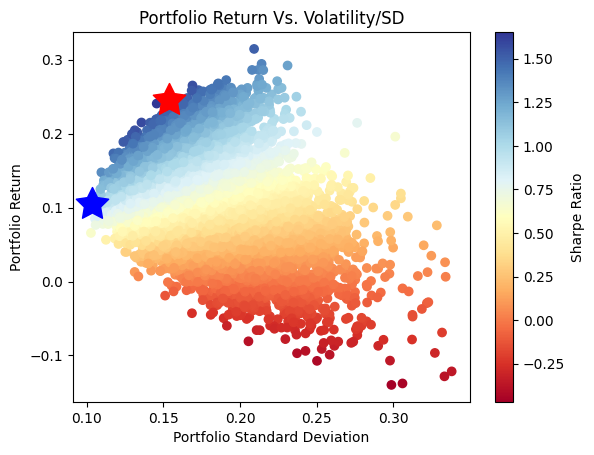

In [130]:

plt.scatter(
    y=MCS_df['Portfolio Returns'],
    x=MCS_df['Portfolio Standard Deviation'],
    c=MCS_df['Sharpe Ratio'],
    cmap='RdYlBu'
)

plt.title('Portfolio Return Vs. Volatility/SD')
plt.colorbar(label='Sharpe Ratio')
plt.xlabel('Portfolio Standard Deviation')
plt.ylabel('Portfolio Return')

plt.scatter(
    max_Sharpe_Ratio[1],
    max_Sharpe_Ratio[0],
    marker=(5, 1, 0),
    color='r',
    s=600
)

# Plot the Min Volatility, using a `Blue Star`.
plt.scatter(
    min_Portfolio_SD[1],
    min_Portfolio_SD[0],
    marker=(5, 1, 0),
    color='b',
    s=600
)

# Finally, show the plot.
plt.show()

### Risk Apetite of the individual

If the risk apetite of the individual is high-risk , he should invest in assets that have high volatility and thus high returns and thus his portfolio will give more weight to risky assets.  Such a portfolio will have high Sharpe ratio but at the same time a very high volatility as well.<br>

If the risk apetite of the individual is low-risk , he should invest in assets that have low volatility and thus low returns and thus his portfolio will give more weight to safe assets.  Such a portfolio will have small Sharpe ratio but at the same time a low volatility as well.<br>

If the risk apetite of the individual is moderate-risk , he shoud diversify his investments between the safe and risky assets to have a decent return which overall suits his investment strategy.  Such a portfolio will have moderate Sharpe ratio and an average volatility.<br>



